## 1. Problem Statement

## Importing basic libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


## 2. Data Gathering

In [2]:
file = pd.read_csv('Model\loan.csv')
file.head()

,loan_amnt,term,int_rate,emp_length,home_ownership,annual_inc,purpose,addr_state,dti,delinq_2yrs,revol_util,total_acc,bad_loan,longest_credit_length,verification_status
0,5000,36 months,10.65,10.0,RENT,24000.0,credit_card,AZ,27.65,0.0,83.7,9.0,0,26.0,verified
1,2500,60 months,15.27,0.0,RENT,30000.0,car,GA,1.00,0.0,9.4,4.0,1,12.0,verified
2,2400,36 months,15.96,10.0,RENT,12252.0,small_business,IL,8.72,0.0,98.5,10.0,0,10.0,not verified
3,10000,36 months,13.49,10.0,RENT,49200.0,other,CA,20.00,0.0,21.0,37.0,0,15.0,verified
4,5000,36 months,7.90,3.0,RENT,36000.0,wedding,AZ,11.20,0.0,28.3,12.0,0,7.0,verified


In [3]:
file['term'].value_counts()

36 months    129950
60 months     34037
Name: term, dtype: int64

In [4]:
file.shape

(163987, 15)

## 3. Data Information

In [5]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163987 entries, 0 to 163986
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   loan_amnt              163987 non-null  int64  
 1   term                   163987 non-null  object 
 2   int_rate               163987 non-null  float64
 3   emp_length             158183 non-null  float64
 4   home_ownership         163987 non-null  object 
 5   annual_inc             163983 non-null  float64
 6   purpose                163987 non-null  object 
 7   addr_state             163987 non-null  object 
 8   dti                    163987 non-null  float64
 9   delinq_2yrs            163958 non-null  float64
 10  revol_util             163794 non-null  float64
 11  total_acc              163958 non-null  float64
 12  bad_loan               163987 non-null  int64  
 13  longest_credit_length  163958 non-null  float64
 14  verification_status    163987 non-nu

In [6]:
categorical_info = file.select_dtypes(include='object').columns
print('Categorical features are : ',categorical_info)
len(categorical_info)

Categorical features are :  Index(['term', 'home_ownership', 'purpose', 'addr_state',
       'verification_status'],
      dtype='object')


5

In [7]:
numerical_info = file.select_dtypes(exclude='object').columns
print('numerica features are : ',numerical_info)
len(numerical_info)

numerica features are :  Index(['loan_amnt', 'int_rate', 'emp_length', 'annual_inc', 'dti',
       'delinq_2yrs', 'revol_util', 'total_acc', 'bad_loan',
       'longest_credit_length'],
      dtype='object')


10

## 3. Exploratory Data Analysis

### 3.1 Count of bad loan

In [8]:
file['bad_loan'].value_counts()

0    133971
1     30016
Name: bad_loan, dtype: int64

#### In target column there is majority of GOOD LOAN (0) ,and less number of BAD LOAN (1) so the dataset is Imbalanced. 

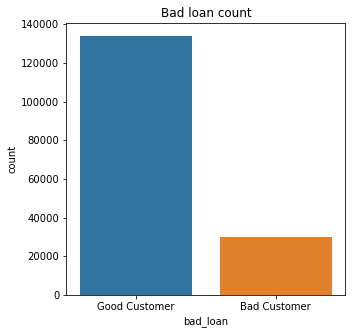

In [9]:
import seaborn as sns
plt.figure(figsize=(5,5))
plt.title("Bad loan count")
sns.countplot(x = file['bad_loan'])
plt.xticks(ticks=np.arange(2) , labels=['Good Customer','Bad Customer'])
plt.show()

####  percentage view :

<AxesSubplot:ylabel='bad_loan'>

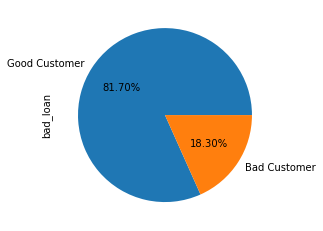

In [10]:
file['bad_loan'].value_counts().plot(kind = 'pie',labels=['Good Customer','Bad Customer'],autopct='%1.2f%%')

### 3.2 Distribution of loan amount

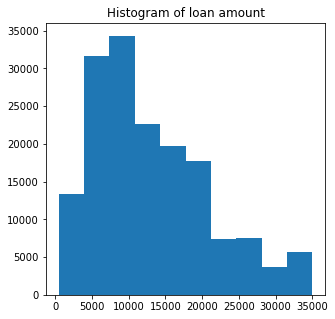

In [11]:
plt.figure(figsize=(5,5))
plt.title('Histogram of loan amount')
plt.hist(x = file['loan_amnt'])
plt.show()

<AxesSubplot:ylabel='loan_amnt'>

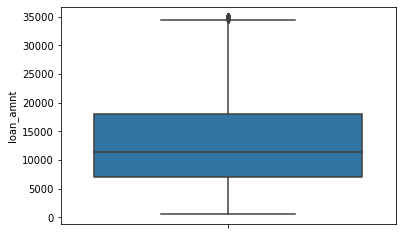

In [12]:
import seaborn as sns
sns.boxplot(y = file['loan_amnt'])

### 3.3 Count plot of term

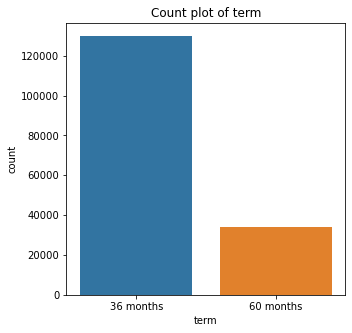

In [13]:
plt.figure(figsize=(5,5))
sns.countplot(x = file['term'])
plt.title('Count plot of term')
plt.xticks(ticks=np.arange(2),labels=file['term'].unique())
plt.show()

<AxesSubplot:ylabel='term'>

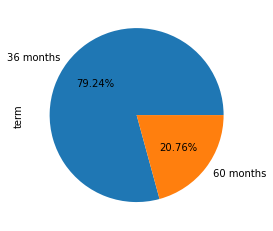

In [14]:
file['term'].value_counts().plot(kind = 'pie',labels=file['term'].unique(),autopct='%1.2f%%')

### 3.4 Distribution of interest rate

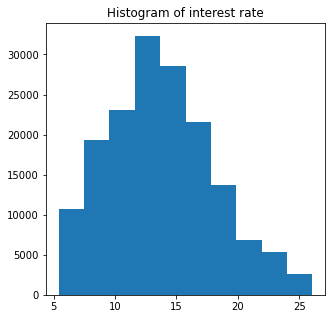

In [15]:
plt.figure(figsize=(5,5))
plt.title('Histogram of interest rate')
plt.hist(x = file['int_rate'])
plt.show()

<AxesSubplot:ylabel='int_rate'>

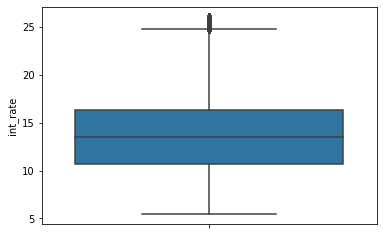

In [16]:
sns.boxplot(y= file['int_rate'])

### 3.5 count of employee length

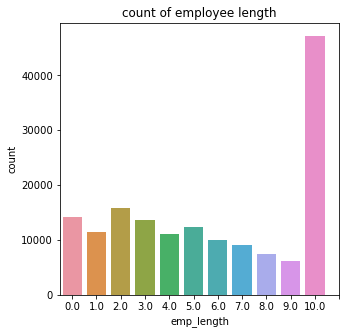

In [17]:
plt.figure(figsize=(5,5))
plt.title('count of employee length')
sns.countplot(x = file['emp_length'])
label = file['emp_length'].unique()
plt.xticks(ticks=np.arange(len(label)))
plt.show()


<AxesSubplot:ylabel='emp_length'>

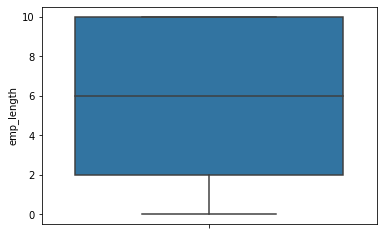

In [18]:
sns.boxplot(y= file['emp_length'])

### 3.6 Count of home ownership

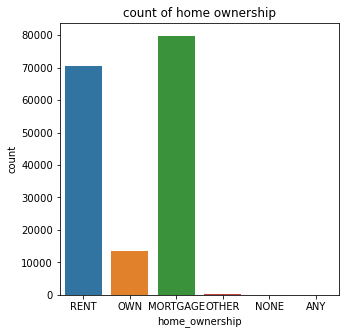

In [19]:
plt.figure(figsize=(5,5))
plt.title('count of home ownership')
sns.countplot(x = file['home_ownership'])
label = file['home_ownership'].unique()
plt.xticks(ticks=np.arange(len(label)))
plt.show()

### 3.7 Distribution of annual income

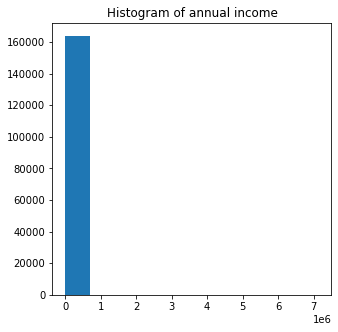

In [20]:
plt.figure(figsize=(5,5))
plt.title('Histogram of annual income')
plt.hist(x = file['annual_inc'])
plt.show()

<AxesSubplot:ylabel='annual_inc'>

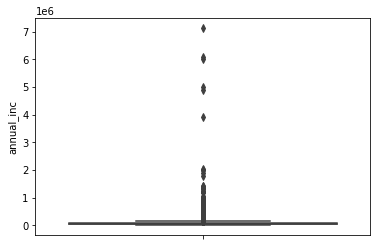

In [21]:
sns.boxplot(y= file['annual_inc'])

### 3.8 Count of purpose

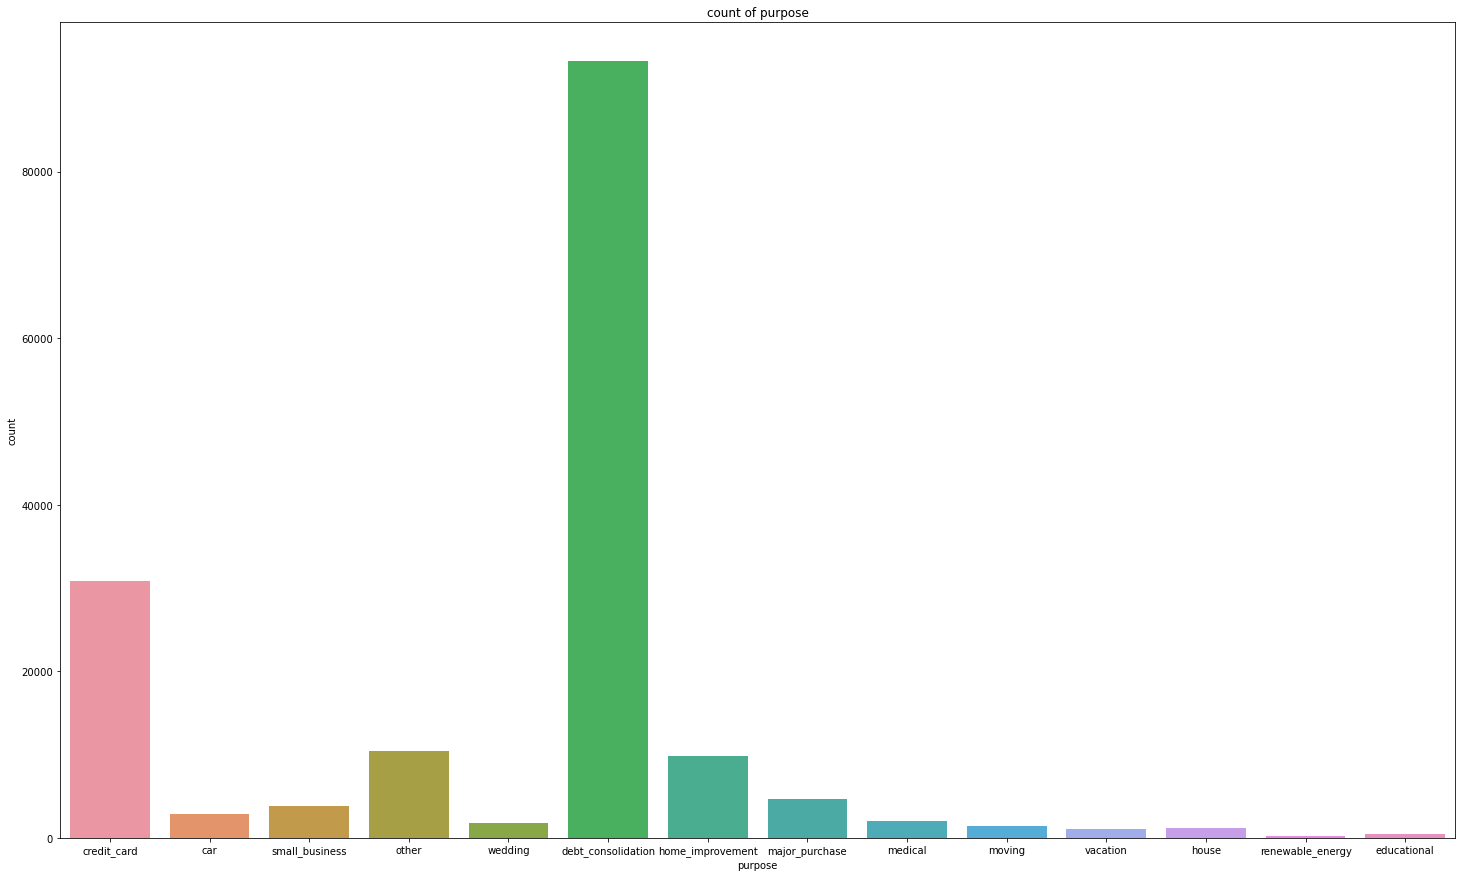

In [22]:
plt.figure(figsize=(25,15))
plt.title('count of purpose')
sns.countplot(x = file['purpose'])
label = file['purpose'].unique()
plt.xticks(ticks=np.arange(len(label)))
plt.show()

### 3.9 count of address state

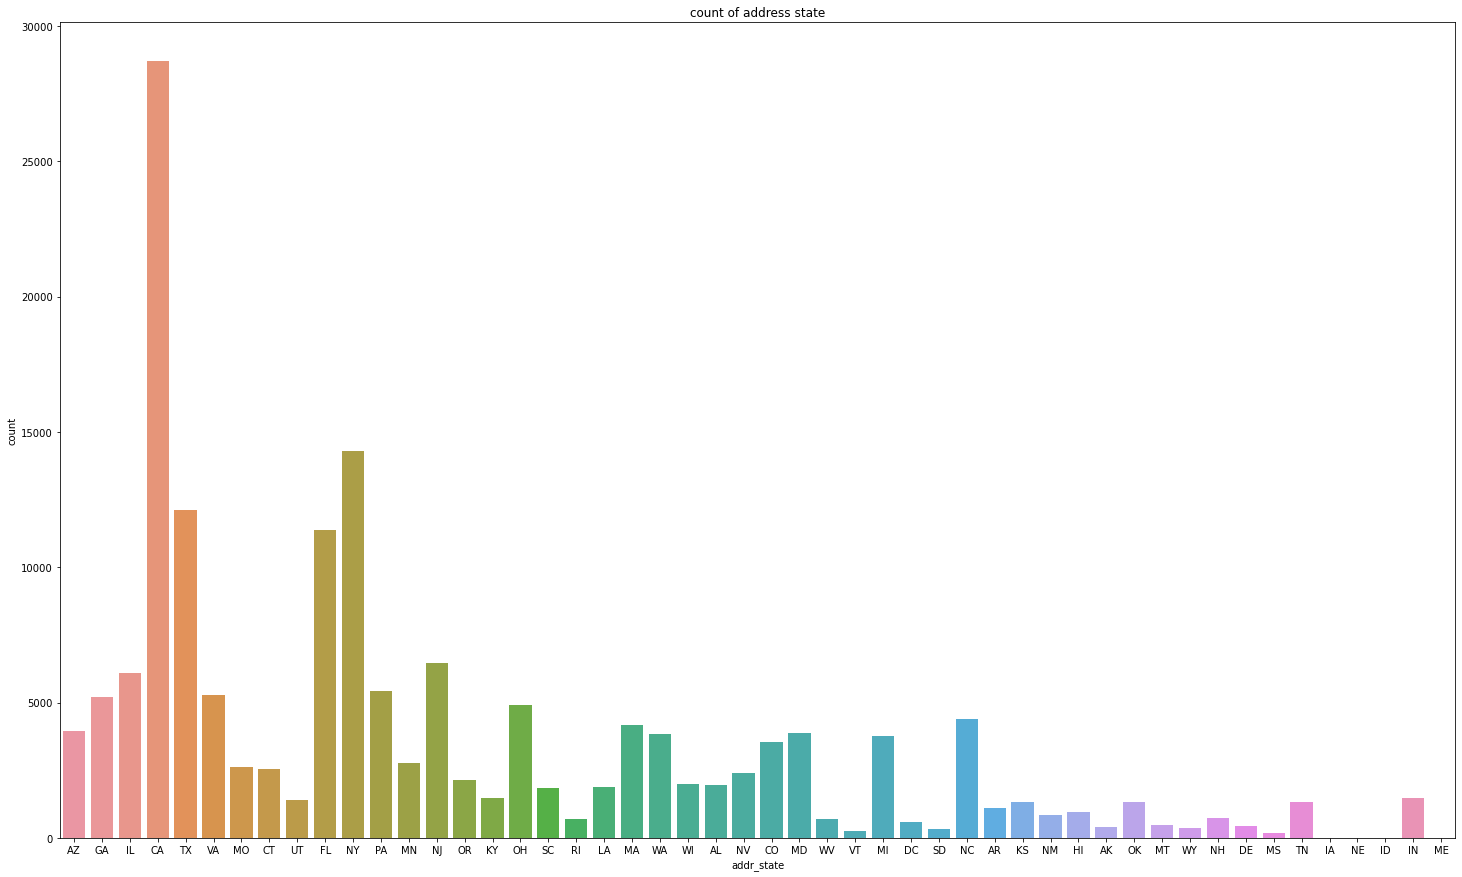

In [23]:
plt.figure(figsize=(25,15))
plt.title('count of address state')
sns.countplot(x = file['addr_state'])
label = file['addr_state'].unique()
plt.xticks(ticks=np.arange(len(label)))
plt.show()

### 3.10 Distribution of dti

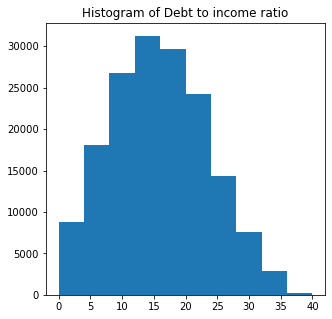

In [24]:
plt.figure(figsize=(5,5))
plt.title('Histogram of Debt to income ratio')
plt.hist(x = file['dti'])
plt.show()

<AxesSubplot:ylabel='dti'>

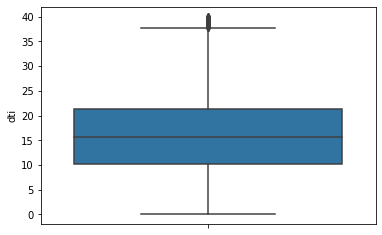

In [25]:
sns.boxplot(y= file['dti'])

### 3.11 Count of deling 

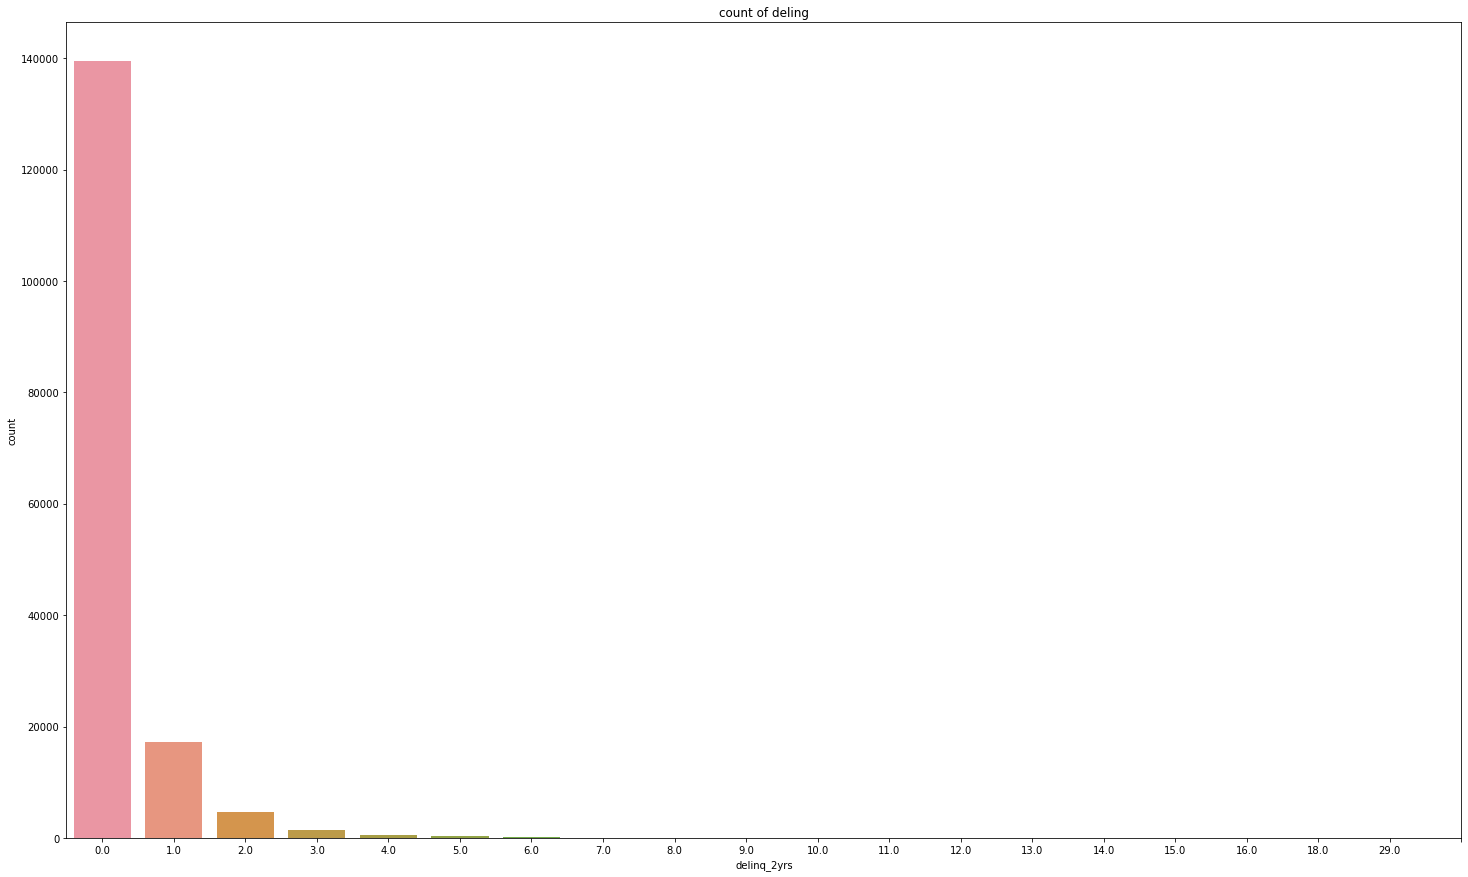

In [26]:
plt.figure(figsize=(25,15))
plt.title('count of deling')
sns.countplot(x = file['delinq_2yrs'])
label = file['delinq_2yrs'].unique()
plt.xticks(ticks=np.arange(len(label)))
plt.show()

<AxesSubplot:ylabel='delinq_2yrs'>

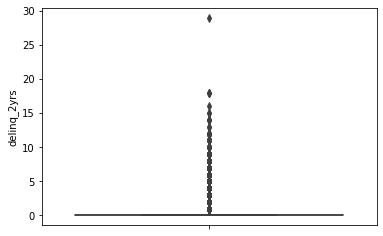

In [27]:
sns.boxplot(y= file['delinq_2yrs'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='delinq_2yrs', ylabel='Density'>

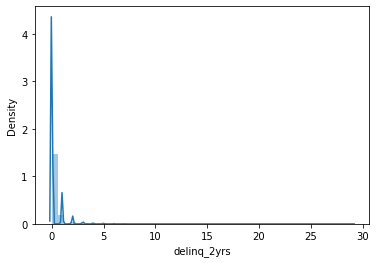

In [28]:
sns.distplot(file['delinq_2yrs'])

### 3.12 Distribution of revolution utility

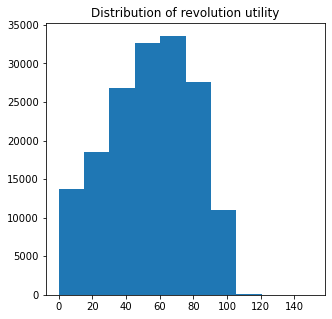

In [29]:
plt.figure(figsize=(5,5))
plt.title('Distribution of revolution utility')
plt.hist(x = file['revol_util'])
plt.show()

<AxesSubplot:ylabel='revol_util'>

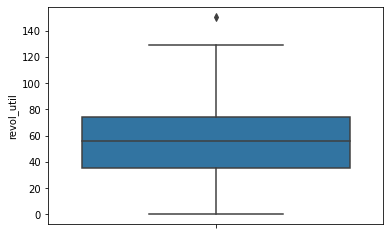

In [30]:
sns.boxplot(y= file['revol_util'])

### 3.13 Distribution of total accounts

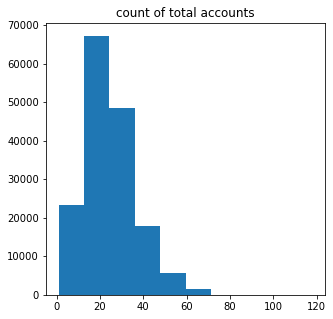

In [31]:
plt.figure(figsize=(5,5))
plt.title('count of total accounts')
plt.hist(x = file['total_acc'])
plt.show()

### 3.14 Distribution of longest credit length

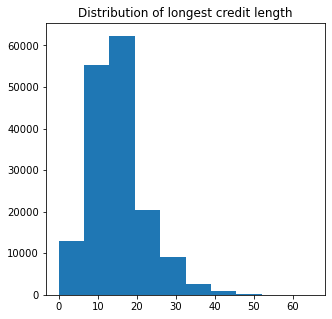

In [32]:
plt.figure(figsize=(5,5))
plt.title('Distribution of longest credit length')
plt.hist(x = file['longest_credit_length'])
plt.show()

<AxesSubplot:ylabel='longest_credit_length'>

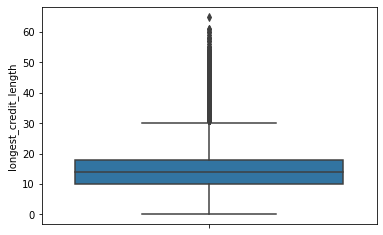

In [33]:
sns.boxplot(y= file['longest_credit_length'])

### 3.15 Count of verification_status

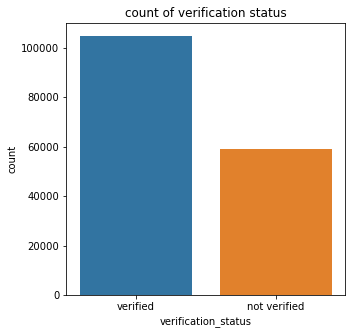

In [34]:
plt.figure(figsize=(5,5))
plt.title('count of verification status')
sns.countplot(x = file['verification_status'])
label = file['verification_status'].unique()
plt.xticks(ticks=np.arange(len(label)))
plt.show()

## 4 Feature Engineering

### Transform Skewed Features

#### Q-Q plot -check whether a feature has normal distribution

In [35]:
import scipy.stats as stats
import pylab

def qq_plot_data(file,feature):
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    file[feature].hist()
    plt.subplot(1,2,2)
    stats.probplot(file[feature],dist='norm',plot=pylab)
    plt.show()

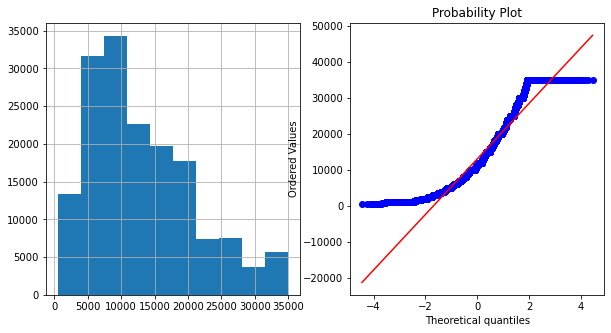

In [36]:
qq_plot_data(file,'loan_amnt')

## Loan_amnt feature correction

##### applying log transform 

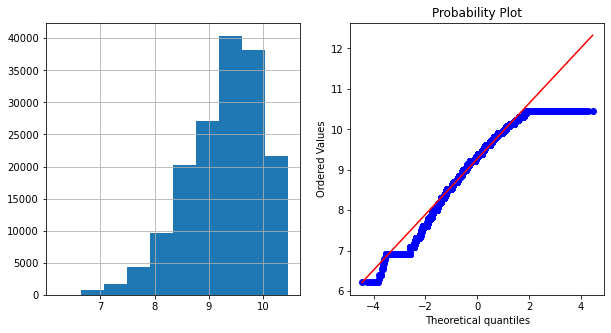

In [37]:
file['loan_amt_log'] = np.log(file.loan_amnt)
qq_plot_data(file,'loan_amt_log')

<AxesSubplot:xlabel='loan_amnt'>

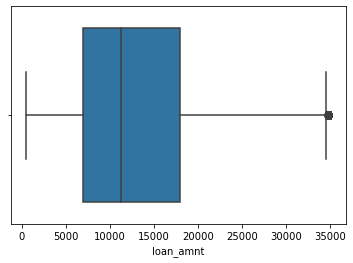

In [38]:
sns.boxplot(x= file['loan_amnt'])

##### applying boxcox transform

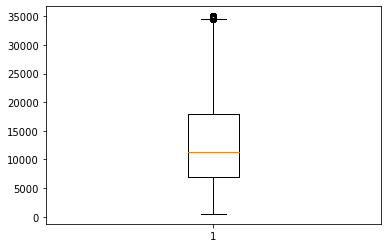

In [39]:
plt.boxplot(file['loan_amnt'])
plt.show()

In [40]:
file['loan_amnt'].describe()

count    163987.000000
mean      13074.169141
std        7993.556189
min         500.000000
25%        7000.000000
50%       11325.000000
75%       18000.000000
max       35000.000000
Name: loan_amnt, dtype: float64

In [41]:
file['loan_amnt'].value_counts()

10000    11795
12000     9164
15000     7598
20000     6864
8000      5860
         ...  
32775        1
27675        1
24425        1
22175        1
33775        1
Name: loan_amnt, Length: 1274, dtype: int64

In [42]:
upper_boundary = file['loan_amnt'].mean()+3*file['loan_amnt'].std()
lower_boundary = file['loan_amnt'].mean()-3*file['loan_amnt'].std()
print('upper_boundary :',upper_boundary)
print('lower_boundary :',lower_boundary)

upper_boundary : 37054.837707662635
lower_boundary : -10906.49942474996


### compute interquantile range to calculate bountries for data which is not normally distributed

In [43]:
IQR = file.loan_amnt.quantile(0.75)-file.loan_amnt.quantile(0.25)
print('IQR :',IQR)

IQR : 11000.0


In [44]:
upper_bridge = file.loan_amnt.quantile(0.75)+(IQR*1.4)
lower_bridge = file.loan_amnt.quantile(0.25)-(IQR)
print('upper_bridge :',upper_bridge)
print('lower_bridge :',lower_bridge)

upper_bridge : 33400.0
lower_bridge : -4000.0


In [45]:
data = file.copy()

In [46]:
data.loc[data['loan_amnt']>=33400.0,'loan_amnt']=33400.0

In [47]:
data['loan_amnt'].unique()

array([ 5000,  2500,  2400, ..., 26525, 29150, 26875], dtype=int64)

<AxesSubplot:ylabel='loan_amnt'>

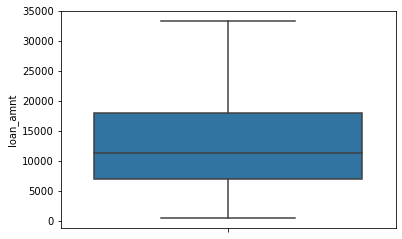

In [48]:
sns.boxplot(y= data['loan_amnt'])

##### applying reciprocal transform

### annual_inc is a Skewed data

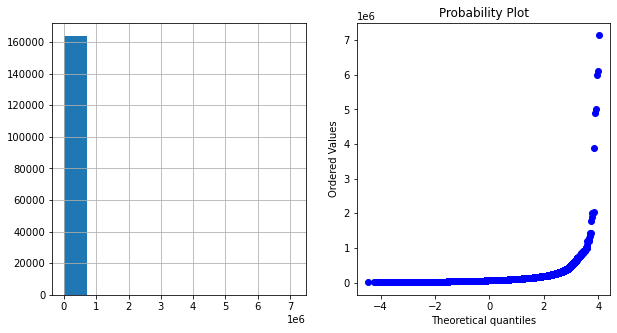

In [49]:
qq_plot_data(data,'annual_inc')

#### applying log transform

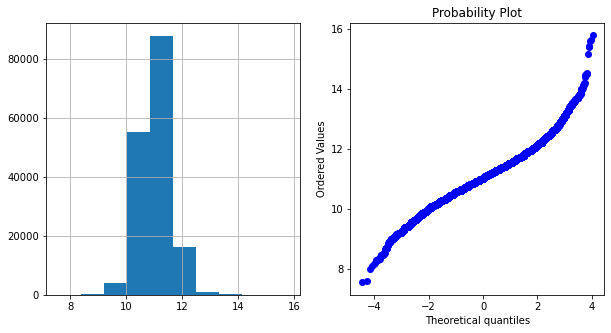

In [50]:
data['annual_inc_log'] = np.log(data.annual_inc)
qq_plot_data(data,'annual_inc_log')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='annual_inc_log', ylabel='Density'>

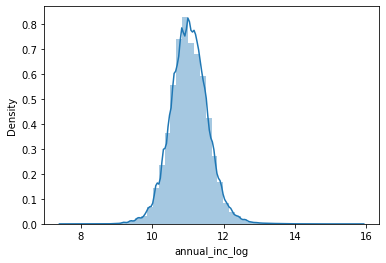

In [51]:
sns.distplot(data['annual_inc_log'])

<AxesSubplot:ylabel='annual_inc_log'>

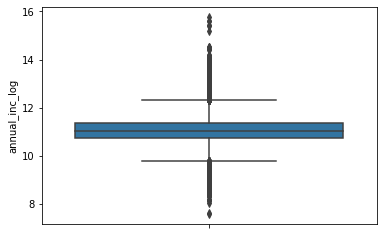

In [52]:
sns.boxplot(y= data['annual_inc_log'])

In [53]:
upper_boundary = data['annual_inc_log'].mean()+3*data['annual_inc_log'].std()
lower_boundary = data['annual_inc_log'].mean()-2.1*data['annual_inc_log'].std()
print('upper_boundary :',upper_boundary)
print('lower_boundary :',lower_boundary)

upper_boundary : 12.611206545493758
lower_boundary : 9.932788536533927


In [54]:
IQR = data.annual_inc_log.quantile(0.75)-data.annual_inc_log.quantile(0.25)
print('IQR :',IQR)

IQR : 0.635988766719997


In [55]:
upper_bridge = data.annual_inc_log.quantile(0.75)+(IQR*1.5)
lower_bridge = data.annual_inc_log.quantile(0.25)-(IQR*1.5)
print('upper_bridge :',upper_bridge)
print('lower_bridge :',lower_bridge)

upper_bridge : 12.304389685552449
lower_bridge : 9.76043461867246


In [56]:
# data = file.copy()

In [57]:
data.tail()

,loan_amnt,term,int_rate,emp_length,home_ownership,annual_inc,purpose,addr_state,dti,delinq_2yrs,revol_util,total_acc,bad_loan,longest_credit_length,verification_status,loan_amt_log,annual_inc_log
163982,15000,60 months,12.39,3.0,MORTGAGE,45000.0,credit_card,OK,31.44,4.0,75.8,34.0,0,20.0,not verified,9.615805,10.714418
163983,20000,36 months,14.99,10.0,OWN,80000.0,home_improvement,VA,23.65,0.0,68.8,18.0,0,22.0,verified,9.903488,11.289782
163984,12825,36 months,17.14,6.0,MORTGAGE,38000.0,debt_consolidation,TX,9.03,0.0,70.7,24.0,0,9.0,not verified,9.459152,10.545341
163985,27650,60 months,21.99,0.0,RENT,60000.0,credit_card,NY,10.10,1.0,61.2,20.0,0,6.0,verified,10.227381,11.002100
163986,17000,60 months,15.99,10.0,MORTGAGE,63078.0,debt_consolidation,PA,31.70,0.0,54.0,28.0,0,16.0,verified,9.740969,11.052127


In [58]:
data.loc[data['annual_inc_log']>=12.30,'annual_inc_log']=12.30
data.loc[data['annual_inc_log']<=9.93,'annual_inc_log']=9.93

<AxesSubplot:ylabel='annual_inc_log'>

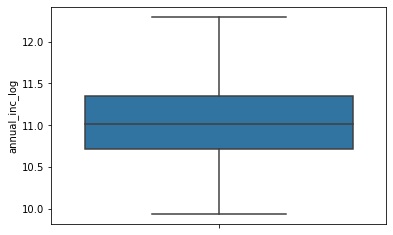

In [59]:
sns.boxplot(y= data['annual_inc_log'])

In [60]:
data[['annual_inc_log']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163987 entries, 0 to 163986
Data columns (total 1 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   annual_inc_log  163983 non-null  float64
dtypes: float64(1)
memory usage: 1.3 MB


In [61]:
data['annual_inc_log'] = data['annual_inc_log'].astype('float64')

In [62]:
data[['annual_inc_log']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163987 entries, 0 to 163986
Data columns (total 1 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   annual_inc_log  163983 non-null  float64
dtypes: float64(1)
memory usage: 1.3 MB


### total_acc is skewed data

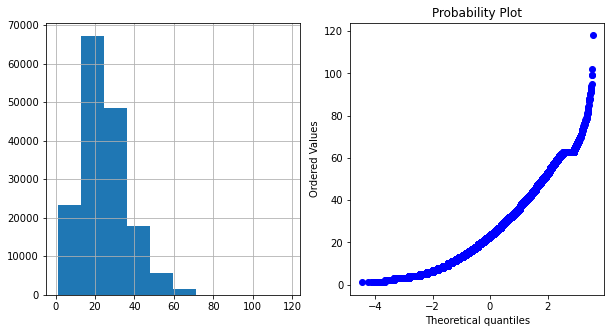

In [63]:
qq_plot_data(data,'total_acc')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total_acc', ylabel='Density'>

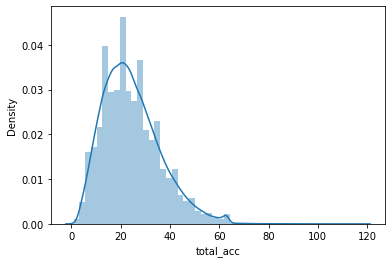

In [64]:
sns.distplot(data['total_acc'])

<AxesSubplot:ylabel='total_acc'>

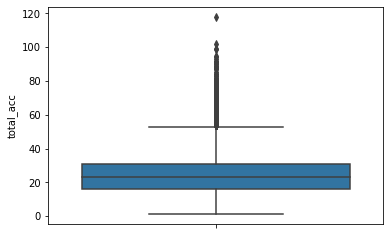

In [65]:
sns.boxplot(y= data['total_acc'])

#### applying log transform

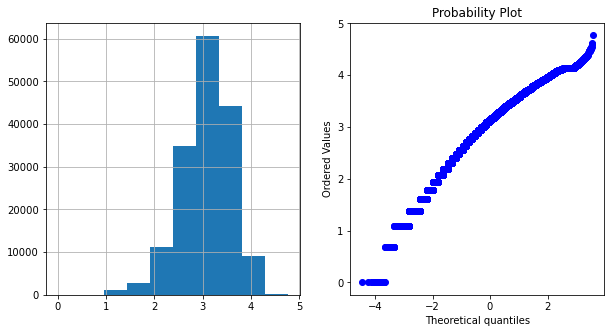

In [66]:
data['total_acc_log'] = np.log(data.total_acc)
qq_plot_data(data,'total_acc_log')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total_acc_log', ylabel='Density'>

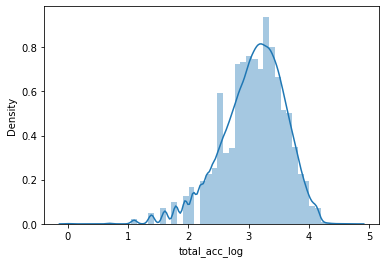

In [67]:
sns.distplot(data['total_acc_log'] )

<AxesSubplot:ylabel='total_acc_log'>

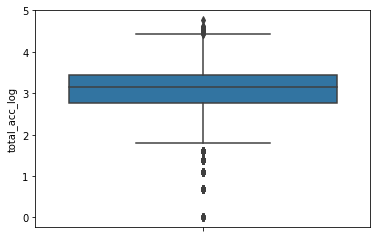

In [68]:
sns.boxplot(y = data['total_acc_log'])

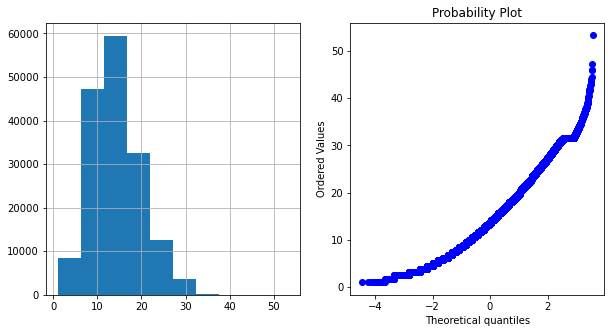

In [69]:
data['total_acc_rec'] = data.total_acc**(1/1.2)
qq_plot_data(data,'total_acc_rec')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total_acc_rec', ylabel='Density'>

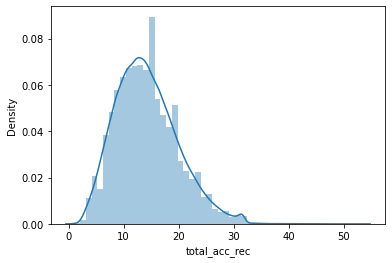

In [70]:
sns.distplot(data['total_acc_rec'])

<AxesSubplot:ylabel='total_acc_rec'>

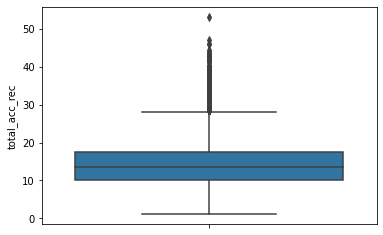

In [71]:
sns.boxplot(y = data['total_acc_rec'])

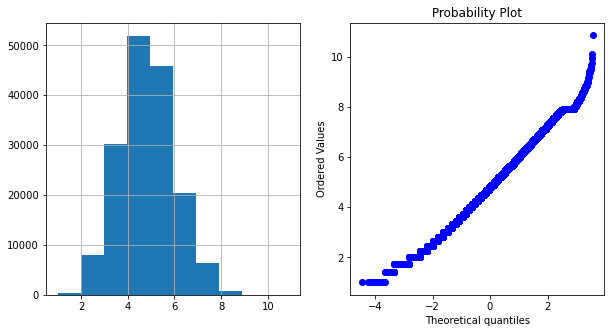

In [72]:
data['total_acc_sqrt'] = data.total_acc**(1/2)
qq_plot_data(data,'total_acc_sqrt')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total_acc_sqrt', ylabel='Density'>

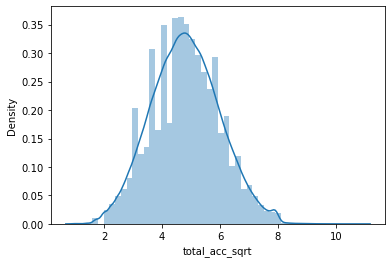

In [73]:
sns.distplot(data['total_acc_sqrt'])

<AxesSubplot:ylabel='total_acc_sqrt'>

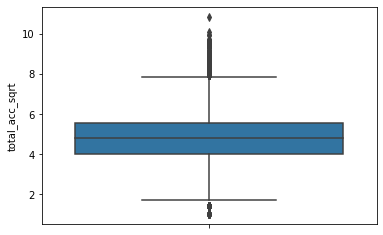

In [74]:
sns.boxplot(y = data['total_acc_sqrt'])

In [75]:
upper_boundary = data['total_acc_sqrt'].mean()+3*data['total_acc_sqrt'].std()
lower_boundary = data['total_acc_sqrt'].mean()-2.1*data['total_acc_sqrt'].std()
print('upper_boundary :',upper_boundary)
print('lower_boundary :',lower_boundary)

upper_boundary : 8.358172043580977
lower_boundary : 2.3348989334575636


In [76]:
IQR = data.total_acc_sqrt.quantile(0.75)-data.total_acc_sqrt.quantile(0.25)
print('IQR :',IQR)

IQR : 1.5677643628300215


In [77]:
upper_bridge = data.total_acc_sqrt.quantile(0.75)+(IQR*1.3)
lower_bridge = data.total_acc_sqrt.quantile(0.25)-(IQR)
print('upper_bridge :',upper_bridge)
print('lower_bridge :',lower_bridge)

upper_bridge : 7.605858034509049
lower_bridge : 2.4322356371699785


In [78]:
data.loc[data['total_acc_sqrt']>=7.60,'total_acc_sqrt']=7.60
data.loc[data['total_acc_sqrt']<=2.43,'total_acc_sqrt']=2.43

<AxesSubplot:ylabel='total_acc_sqrt'>

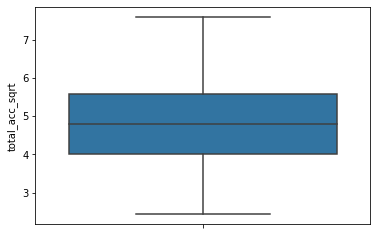

In [79]:
sns.boxplot(y = data['total_acc_sqrt'])

## interest rate

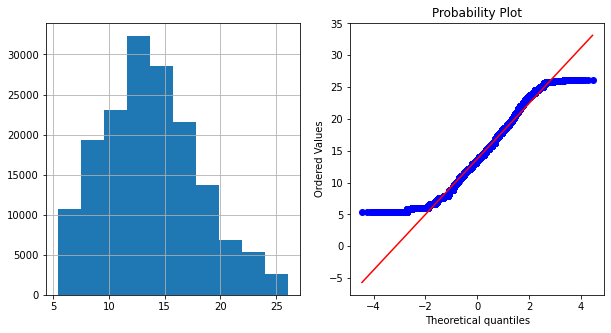

In [80]:
qq_plot_data(data,'int_rate')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='int_rate', ylabel='Density'>

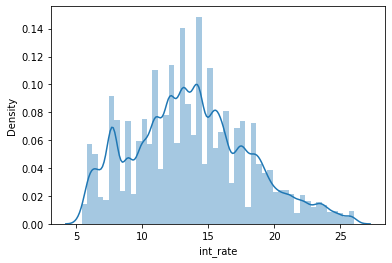

In [81]:
sns.distplot(data['int_rate'])

<AxesSubplot:ylabel='int_rate'>

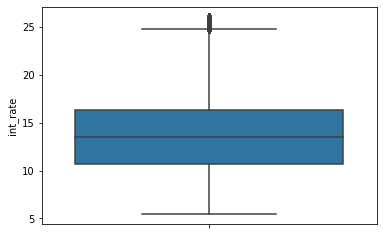

In [82]:
sns.boxplot(y=data['int_rate'])

In [83]:
upper_boundary = data['int_rate'].mean()+3*data['int_rate'].std()
lower_boundary = data['int_rate'].mean()-2.1*data['int_rate'].std()
print('upper_boundary :',upper_boundary)
print('lower_boundary :',lower_boundary)

upper_boundary : 26.89172367720948
lower_boundary : 4.492830337428224


In [84]:
IQR = data.int_rate.quantile(0.75)-data.int_rate.quantile(0.25)
print('IQR :',IQR)

IQR : 5.67


In [85]:
upper_bridge = data.int_rate.quantile(0.75)+(IQR*1.3)
lower_bridge = data.int_rate.quantile(0.25)-(IQR)
print('upper_bridge :',upper_bridge)
print('lower_bridge :',lower_bridge)

upper_bridge : 23.691000000000003
lower_bridge : 4.98


In [86]:
# data = file.copy()

In [87]:
data.loc[data['int_rate']>=23.69,'int_rate']=23.69
data.loc[data['int_rate']<=4.98,'int_rate']=4.98

<AxesSubplot:ylabel='int_rate'>

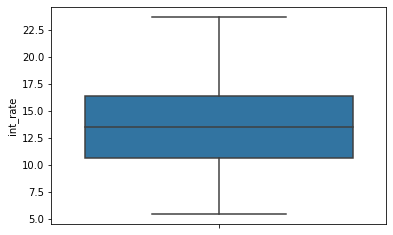

In [88]:
sns.boxplot(y=data['int_rate'])

## dti

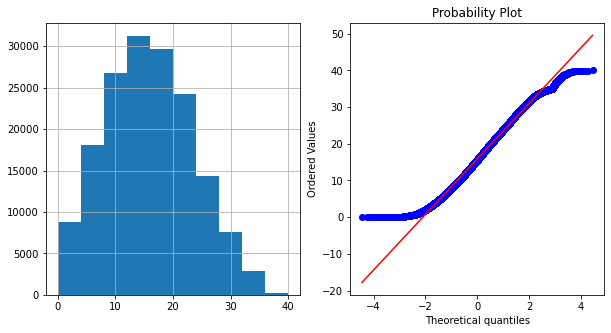

In [89]:
qq_plot_data(data,'dti')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='dti', ylabel='Density'>

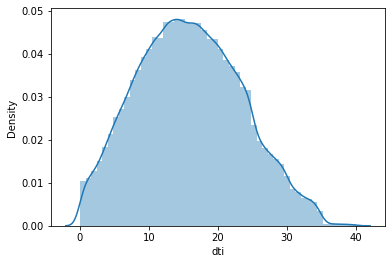

In [90]:
sns.distplot(data['dti'])

<AxesSubplot:ylabel='dti'>

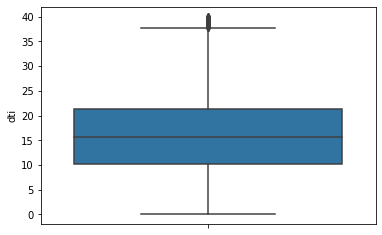

In [91]:
sns.boxplot(y=data['dti'])

In [92]:
upper_boundary = data['dti'].mean()+2.5*data['dti'].std()
lower_boundary = data['dti'].mean()-2.1*data['dti'].std()
print('upper_boundary :',upper_boundary)
print('lower_boundary :',lower_boundary)

upper_boundary : 34.850700681771215
lower_boundary : -0.052573149513612805


In [93]:
# data = file.copy()

In [94]:
data.loc[data['dti']>=34.85,'dti']=34.85

<AxesSubplot:ylabel='dti'>

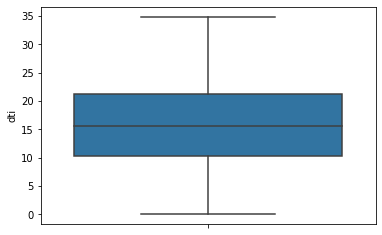

In [95]:
sns.boxplot(y=data['dti'])

## deling 2years

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='delinq_2yrs', ylabel='Density'>

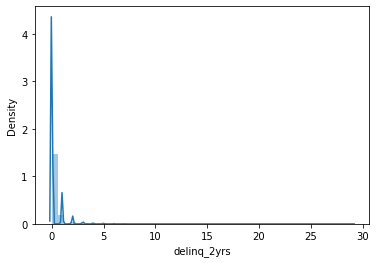

In [96]:
sns.distplot(data['delinq_2yrs'])

<AxesSubplot:ylabel='delinq_2yrs'>

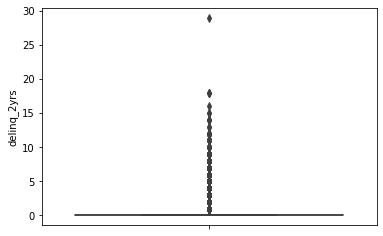

In [97]:
sns.boxplot(y=data['delinq_2yrs'])

In [98]:
IQR = data.delinq_2yrs.quantile(0.75)-data.delinq_2yrs.quantile(0.25)
print('IQR :',IQR)

IQR : 0.0


In [99]:
upper_bridge = data.delinq_2yrs.quantile(0.75)+(IQR*1.3)
lower_bridge = data.delinq_2yrs.quantile(0.25)-(IQR)
print('upper_bridge :',upper_bridge)
print('lower_bridge :',lower_bridge)

upper_bridge : 0.0
lower_bridge : 0.0


In [100]:
# data =file.copy()

In [101]:
data.loc[data['delinq_2yrs']>=0.0,'delinq_2yrs']=0.0

<AxesSubplot:ylabel='delinq_2yrs'>

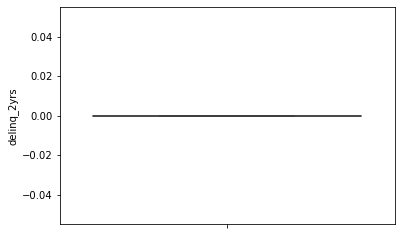

In [102]:
sns.boxplot(y=data['delinq_2yrs'])

## revolution utility

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='revol_util', ylabel='Density'>

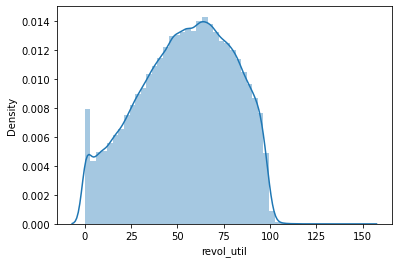

In [103]:
sns.distplot(data['revol_util'])

<AxesSubplot:ylabel='revol_util'>

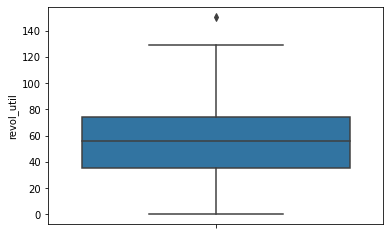

In [104]:
sns.boxplot(y=data['revol_util'])

In [105]:
IQR = data.revol_util.quantile(0.75)-data.revol_util.quantile(0.25)
print('IQR :',IQR)

IQR : 38.6


In [106]:
upper_bridge = data.revol_util.quantile(0.75)+(IQR*1.2)
lower_bridge = data.revol_util.quantile(0.25)-(IQR)
print('upper_bridge :',upper_bridge)
print('lower_bridge :',lower_bridge)

upper_bridge : 120.52000000000001
lower_bridge : -3.0


In [107]:
# data = file.copy()

In [108]:
data.loc[data['revol_util']>=120.52,'revol_util']=120.52

<AxesSubplot:ylabel='revol_util'>

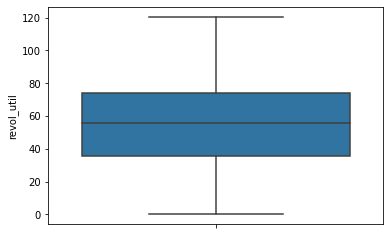

In [109]:
sns.boxplot(y=data['revol_util'])

### longest_credit_length is skewed data

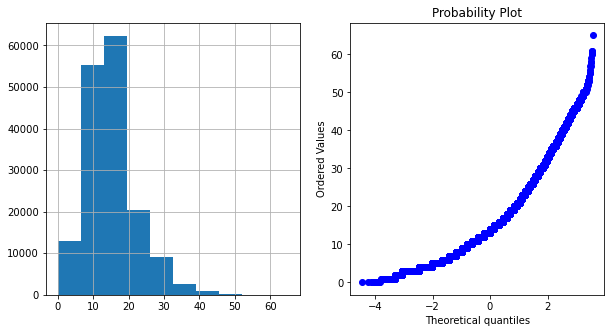

In [110]:
qq_plot_data(data,'longest_credit_length')

#### applying squate root transform 

In [111]:
data.replace(np.inf,np.nan)
    

,loan_amnt,term,int_rate,emp_length,home_ownership,annual_inc,purpose,addr_state,dti,delinq_2yrs,revol_util,total_acc,bad_loan,longest_credit_length,verification_status,loan_amt_log,annual_inc_log,total_acc_log,total_acc_rec,total_acc_sqrt
0,5000,36 months,10.65,10.0,RENT,24000.0,credit_card,AZ,27.65,0.0,83.7,9.0,0,26.0,verified,8.517193,10.085809,2.197225,6.240251,3.000000
1,2500,60 months,15.27,0.0,RENT,30000.0,car,GA,1.00,0.0,9.4,4.0,1,12.0,verified,7.824046,10.308953,1.386294,3.174802,2.430000
2,2400,36 months,15.96,10.0,RENT,12252.0,small_business,IL,8.72,0.0,98.5,10.0,0,10.0,not verified,7.783224,9.930000,2.302585,6.812921,3.162278
3,10000,36 months,13.49,10.0,RENT,49200.0,other,CA,20.00,0.0,21.0,37.0,0,15.0,verified,9.210340,10.803649,3.610918,20.269114,6.082763
4,5000,36 months,7.90,3.0,RENT,36000.0,wedding,AZ,11.20,0.0,28.3,12.0,0,7.0,verified,8.517193,10.491274,2.484907,7.930813,3.464102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163982,15000,60 months,12.39,3.0,MORTGAGE,45000.0,credit_card,OK,31.44,0.0,75.8,34.0,0,20.0,not verified,9.615805,10.714418,3.526361,18.890021,5.830952
163983,20000,36 months,14.99,10.0,OWN,80000.0,home_improvement,VA,23.65,0.0,68.8,18.0,0,22.0,verified,9.903488,11.289782,2.890372,11.118864,4.242641
163984,12825,36 months,17.14,6.0,MORTGAGE,38000.0,debt_consolidation,TX,9.03,0.0,70.7,24.0,0,9.0,not verified,9.459152,10.545341,3.178054,14.131102,4.898979
163985,27650,60 months,21.99,0.0,RENT,60000.0,credit_card,NY,10.10,0.0,61.2,20.0,0,6.0,verified,10.227381,11.002100,2.995732,12.139245,4.472136


In [112]:
data['longest_credit_length'] = data['longest_credit_length'].fillna(data['longest_credit_length'].median())

In [113]:
data['longest_credit_length'].unique()

array([26., 12., 10., 15.,  7.,  4., 13., 22.,  8., 20., 18., 28.,  9.,
       27.,  5., 24., 30.,  6., 11., 17., 16., 19., 14., 25., 21., 23.,
       31.,  3., 32., 33., 40., 41., 42., 36., 29., 35., 49., 43., 37.,
       34., 39., 44., 46., 38., 48., 57., 45., 47., 52., 55., 65., 61.,
       50., 56.,  2.,  1.,  0., 51., 53., 54., 58., 59., 60.])

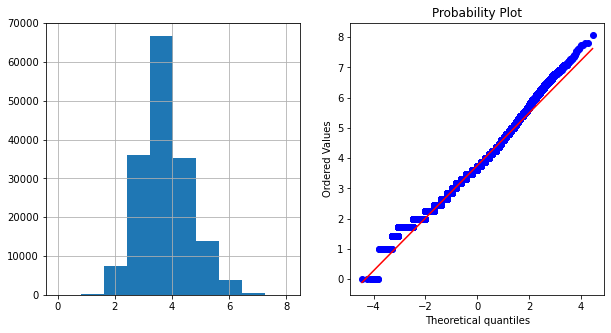

In [114]:
data['longest_credit_len_sqrt'] = data.longest_credit_length**(1/2)
qq_plot_data(data,'longest_credit_len_sqrt')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='longest_credit_len_sqrt', ylabel='Density'>

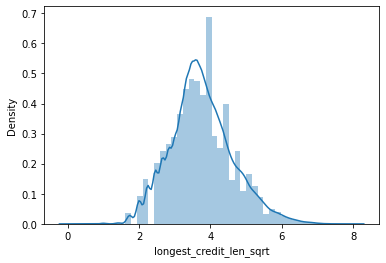

In [115]:
sns.distplot(data['longest_credit_len_sqrt'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='longest_credit_length', ylabel='Density'>

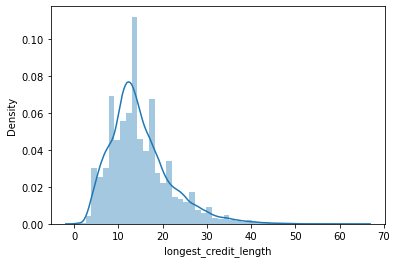

In [116]:
sns.distplot(data['longest_credit_length'])

<AxesSubplot:ylabel='longest_credit_len_sqrt'>

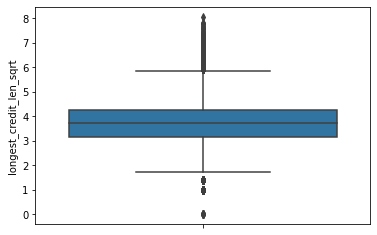

In [117]:
sns.boxplot(y=data['longest_credit_len_sqrt'])

In [118]:
IQR = data.longest_credit_length.quantile(0.75)-data.longest_credit_length.quantile(0.25)
print('IQR :',IQR)

IQR : 8.0


In [119]:
upper_bridge = data.longest_credit_length.quantile(0.75)+(IQR*1.2)
lower_bridge = data.longest_credit_length.quantile(0.25)-(IQR)
print('upper_bridge :',upper_bridge)
print('lower_bridge :',lower_bridge)

upper_bridge : 27.6
lower_bridge : 2.0


In [120]:
# data=file.copy()

In [121]:
data.loc[data['longest_credit_length']>=27.6,'longest_credit_length']=27.6

<AxesSubplot:ylabel='longest_credit_length'>

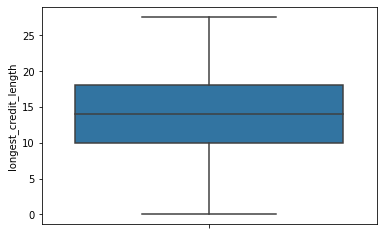

In [122]:
sns.boxplot(y=data['longest_credit_length'])

In [123]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163987 entries, 0 to 163986
Data columns (total 21 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   loan_amnt                163987 non-null  int64  
 1   term                     163987 non-null  object 
 2   int_rate                 163987 non-null  float64
 3   emp_length               158183 non-null  float64
 4   home_ownership           163987 non-null  object 
 5   annual_inc               163983 non-null  float64
 6   purpose                  163987 non-null  object 
 7   addr_state               163987 non-null  object 
 8   dti                      163987 non-null  float64
 9   delinq_2yrs              163958 non-null  float64
 10  revol_util               163794 non-null  float64
 11  total_acc                163958 non-null  float64
 12  bad_loan                 163987 non-null  int64  
 13  longest_credit_length    163987 non-null  float64
 14  veri

In [124]:
months_dummy = pd.get_dummies(data['term'])

In [125]:
term_col = data['term']
term_col.unique()

array(['36 months', '60 months'], dtype=object)

In [126]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163987 entries, 0 to 163986
Data columns (total 21 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   loan_amnt                163987 non-null  int64  
 1   term                     163987 non-null  object 
 2   int_rate                 163987 non-null  float64
 3   emp_length               158183 non-null  float64
 4   home_ownership           163987 non-null  object 
 5   annual_inc               163983 non-null  float64
 6   purpose                  163987 non-null  object 
 7   addr_state               163987 non-null  object 
 8   dti                      163987 non-null  float64
 9   delinq_2yrs              163958 non-null  float64
 10  revol_util               163794 non-null  float64
 11  total_acc                163958 non-null  float64
 12  bad_loan                 163987 non-null  int64  
 13  longest_credit_length    163987 non-null  float64
 14  veri

In [127]:
data['home_ownership'].value_counts()

MORTGAGE    79714
RENT        70526
OWN         13560
OTHER         156
NONE           30
ANY             1
Name: home_ownership, dtype: int64

In [128]:
home_own_dummy = pd.get_dummies(data['home_ownership'])
 

In [129]:
data['purpose'].value_counts()

debt_consolidation    93261
credit_card           30792
other                 10492
home_improvement       9872
major_purchase         4686
small_business         3841
car                    2842
medical                2029
wedding                1751
moving                 1464
house                  1245
vacation               1096
educational             418
renewable_energy        198
Name: purpose, dtype: int64

In [130]:
purpose_dummy = pd.get_dummies(data['purpose'])
purpose_dummy

,car,credit_card,debt_consolidation,educational,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding
0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163982,0,1,0,0,0,0,0,0,0,0,0,0,0,0
163983,0,0,0,0,1,0,0,0,0,0,0,0,0,0
163984,0,0,1,0,0,0,0,0,0,0,0,0,0,0
163985,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [131]:
addr_state_enc = pd.get_dummies(data['addr_state'])
addr_state_enc

,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163982,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
163983,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
163984,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
163985,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [132]:
# data['verification_status'].replace({'verified' : 1,'not verified' : 0},inplace = True)

In [133]:
verify_dummy = pd.get_dummies(data['verification_status'])
verify_dummy

,not verified,verified
0,0,1
1,0,1
2,1,0
3,0,1
4,0,1
...,...,...
163982,1,0
163983,0,1
163984,1,0
163985,0,1


In [134]:
data.isna().sum()

loan_amnt                     0
term                          0
int_rate                      0
emp_length                 5804
home_ownership                0
annual_inc                    4
purpose                       0
addr_state                    0
dti                           0
delinq_2yrs                  29
revol_util                  193
total_acc                    29
bad_loan                      0
longest_credit_length         0
verification_status           0
loan_amt_log                  0
annual_inc_log                4
total_acc_log                29
total_acc_rec                29
total_acc_sqrt               29
longest_credit_len_sqrt       0
dtype: int64

In [135]:
data['emp_length'] = data['emp_length'].fillna(data['emp_length'].median())
data['annual_inc'] = data['annual_inc'].fillna(data['annual_inc'].median())
data['delinq_2yrs'] = data['delinq_2yrs'].fillna(data['delinq_2yrs'].median())
data['revol_util'] = data['revol_util'].fillna(data['revol_util'].median())
data['total_acc'] = data['total_acc'].fillna(data['total_acc'].median())
data['annual_inc_log'] = data['annual_inc_log'].fillna(data['annual_inc_log'].median())
# file['total_acc_log'] = file['total_acc_log'].fillna(file['total_acc_log'].median())
# file['total_acc_rec'] = file['total_acc_rec'].fillna(file['total_acc_rec'].median())
# file['loan_amnt'] = file['loan_amnt'].fillna(file['loan_amnt'].median())


In [136]:
data['longest_credit_length'].unique()

array([26. , 12. , 10. , 15. ,  7. ,  4. , 13. , 22. ,  8. , 20. , 18. ,
       27.6,  9. , 27. ,  5. , 24. ,  6. , 11. , 17. , 16. , 19. , 14. ,
       25. , 21. , 23. ,  3. ,  2. ,  1. ,  0. ])

In [137]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163987 entries, 0 to 163986
Data columns (total 21 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   loan_amnt                163987 non-null  int64  
 1   term                     163987 non-null  object 
 2   int_rate                 163987 non-null  float64
 3   emp_length               163987 non-null  float64
 4   home_ownership           163987 non-null  object 
 5   annual_inc               163987 non-null  float64
 6   purpose                  163987 non-null  object 
 7   addr_state               163987 non-null  object 
 8   dti                      163987 non-null  float64
 9   delinq_2yrs              163987 non-null  float64
 10  revol_util               163987 non-null  float64
 11  total_acc                163987 non-null  float64
 12  bad_loan                 163987 non-null  int64  
 13  longest_credit_length    163987 non-null  float64
 14  veri

In [138]:
data.drop(['term','home_ownership','purpose','addr_state','loan_amt_log','verification_status','longest_credit_len_sqrt','annual_inc','total_acc','total_acc_log','total_acc_rec','delinq_2yrs'],axis=1,inplace=True)

In [139]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163987 entries, 0 to 163986
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   loan_amnt              163987 non-null  int64  
 1   int_rate               163987 non-null  float64
 2   emp_length             163987 non-null  float64
 3   dti                    163987 non-null  float64
 4   revol_util             163987 non-null  float64
 5   bad_loan               163987 non-null  int64  
 6   longest_credit_length  163987 non-null  float64
 7   annual_inc_log         163987 non-null  float64
 8   total_acc_sqrt         163958 non-null  float64
dtypes: float64(7), int64(2)
memory usage: 11.3 MB


In [140]:
data['total_acc_sqrt'] = data['total_acc_sqrt'].fillna(data['total_acc_sqrt'].median())

In [141]:
home_own_dummy.columns

Index(['ANY', 'MORTGAGE', 'NONE', 'OTHER', 'OWN', 'RENT'], dtype='object')

In [142]:
df = pd.concat([data,home_own_dummy,purpose_dummy,addr_state_enc,months_dummy,verify_dummy],axis=1)
df

,loan_amnt,int_rate,emp_length,dti,revol_util,bad_loan,longest_credit_length,annual_inc_log,total_acc_sqrt,ANY,...,VA,VT,WA,WI,WV,WY,36 months,60 months,not verified,verified
0,5000,10.65,10.0,27.65,83.7,0,26.0,10.085809,3.000000,0,...,0,0,0,0,0,0,1,0,0,1
1,2500,15.27,0.0,1.00,9.4,1,12.0,10.308953,2.430000,0,...,0,0,0,0,0,0,0,1,0,1
2,2400,15.96,10.0,8.72,98.5,0,10.0,9.930000,3.162278,0,...,0,0,0,0,0,0,1,0,1,0
3,10000,13.49,10.0,20.00,21.0,0,15.0,10.803649,6.082763,0,...,0,0,0,0,0,0,1,0,0,1
4,5000,7.90,3.0,11.20,28.3,0,7.0,10.491274,3.464102,0,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163982,15000,12.39,3.0,31.44,75.8,0,20.0,10.714418,5.830952,0,...,0,0,0,0,0,0,0,1,1,0
163983,20000,14.99,10.0,23.65,68.8,0,22.0,11.289782,4.242641,0,...,1,0,0,0,0,0,1,0,0,1
163984,12825,17.14,6.0,9.03,70.7,0,9.0,10.545341,4.898979,0,...,0,0,0,0,0,0,1,0,1,0
163985,27650,21.99,0.0,10.10,61.2,0,6.0,11.002100,4.472136,0,...,0,0,0,0,0,0,0,1,0,1


In [143]:
# df.info()

In [144]:
y = df['bad_loan']
x = df.drop(['bad_loan'],axis=1)

In [145]:
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size = 0.3,random_state = 1)

## Decision tree

In [146]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.metrics import confusion_matrix,precision_score,f1_score,classification_report

#### by Hyperparameter 

In [147]:
DTC = DecisionTreeClassifier(random_state= 42)

In [148]:
from sklearn.model_selection import GridSearchCV
hyperparameter = {'criterion' : ['entropy','gini'], 'max_depth' : list(range(2,25)) }

dt_hyp = GridSearchCV( DTC, hyperparameter , cv =5)

best_model = dt_hyp.fit(X_train, Y_train)

In [149]:
best_model.best_params_

{'criterion': 'gini', 'max_depth': 5}

In [150]:
y_pred = best_model.predict(X_test)

In [151]:
confusion_matrix(Y_test,y_pred)

array([[40144,   138],
       [ 8770,   145]], dtype=int64)

In [152]:
cls_report = classification_report(Y_test,y_pred)
print(cls_report)

              precision    recall  f1-score   support

           0       0.82      1.00      0.90     40282
           1       0.51      0.02      0.03      8915

    accuracy                           0.82     49197
   macro avg       0.67      0.51      0.47     49197
weighted avg       0.76      0.82      0.74     49197



In [153]:
accuracy_score(Y_test,y_pred)

0.8189320487021566

In [154]:
X_test.head(3)

,loan_amnt,int_rate,emp_length,dti,revol_util,longest_credit_length,annual_inc_log,total_acc_sqrt,ANY,MORTGAGE,...,VA,VT,WA,WI,WV,WY,36 months,60 months,not verified,verified
128345,18000,14.49,9.0,26.08,75.0,16.0,11.002100,5.477226,0,1,...,0,0,0,0,0,0,0,1,0,1
103202,31000,19.72,6.0,11.87,74.9,20.0,11.617285,4.582576,0,0,...,0,0,0,0,0,0,1,0,0,1
121948,5400,10.74,6.0,13.10,70.9,6.0,10.308953,4.000000,0,1,...,0,0,0,0,0,0,1,0,1,0


In [155]:
x.columns

Index(['loan_amnt', 'int_rate', 'emp_length', 'dti', 'revol_util',
       'longest_credit_length', 'annual_inc_log', 'total_acc_sqrt', 'ANY',
       'MORTGAGE', 'NONE', 'OTHER', 'OWN', 'RENT', 'car', 'credit_card',
       'debt_consolidation', 'educational', 'home_improvement', 'house',
       'major_purchase', 'medical', 'moving', 'other', 'renewable_energy',
       'small_business', 'vacation', 'wedding', 'AK', 'AL', 'AR', 'AZ', 'CA',
       'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS',
       'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'NE',
       'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD',
       'TN', 'TX', 'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY', '36 months',
       '60 months', 'not verified', 'verified'],
      dtype='object')

In [156]:
y_pred[:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [157]:
Y_train.head(9)

86335     0
159796    1
37379     0
136711    0
95091     0
29399     0
92571     0
94141     0
51671     1
Name: bad_loan, dtype: int64

In [158]:
X_train.head(9)

,loan_amnt,int_rate,emp_length,dti,revol_util,longest_credit_length,annual_inc_log,total_acc_sqrt,ANY,MORTGAGE,...,VA,VT,WA,WI,WV,WY,36 months,60 months,not verified,verified
86335,21600,16.29,7.0,12.30,43.5,19.0,11.373663,6.000000,0,1,...,0,0,0,0,0,0,0,1,0,1
159796,21250,19.22,10.0,20.77,35.6,10.0,10.799576,4.898979,0,1,...,0,0,0,0,0,0,0,1,0,1
37379,5000,15.65,0.0,23.48,75.0,5.0,10.344159,4.472136,0,0,...,0,0,0,0,0,0,1,0,1,0
136711,5000,14.99,5.0,5.70,28.9,14.0,11.695247,5.744563,0,0,...,0,0,0,0,0,0,1,0,0,1
95091,7200,12.12,3.0,10.47,87.4,16.0,11.302204,5.477226,0,0,...,0,0,0,0,0,0,1,0,1,0
29399,14000,13.22,3.0,9.19,54.7,7.0,10.915088,4.582576,0,1,...,0,0,0,0,0,0,1,0,1,0
92571,33400,18.75,3.0,9.80,48.5,18.0,12.300000,6.782330,0,1,...,0,0,0,0,0,0,0,1,0,1
94141,2400,16.29,1.0,7.65,26.5,7.0,10.463103,3.741657,0,1,...,0,0,0,0,0,0,1,0,0,1
51671,15850,17.10,8.0,3.51,20.9,9.0,11.352193,3.464102,0,1,...,0,0,0,0,0,0,1,0,0,1


In [159]:
def prediction_BadLoan(loan_amount,months,interest_rate,emp_length,home_ownership,annual_income,purpose,address_state,dti,delinq_2yrs,revolution_util,total_accounts,longest_credit_length,verification_status):
    months = X_test.columns.get_loc(months)
    home_own = X_test.columns.get_loc(home_ownership)
    purpose = X_test.columns.get_loc(purpose)
    state = X_test.columns.get_loc(address_state)
    verify = X_test.columns.get_loc(verification_status)
    
    m = np.zeros(len(x.columns))
    
    m[0] = loan_amount
    m[months] = 1
    m[2] = float(interest_rate)
    m[3] = float(emp_length)
    m[home_own] = 1 
    m[4] = float(annual_income)
    m[purpose] = 1
    m[state] = 1
    m[5] = float(dti)
    m[6] = delinq_2yrs
    m[7] = revolution_util
    m[8] = total_accounts
    m[9] = longest_credit_length
    m[verify] = 1
    return dt_hyp.predict([m])[0]

In [161]:
prediction_BadLoan(1.265720,'60 months',15.27,0.0,'RENT',10.308953,'car','GA',1.00,0,9.4,3.174802,26,'verified')

0

In [162]:
prediction_BadLoan(-0.347060,'36 months',0.407407,-0.500,'RENT',0.193765,'other','TX',-0.970082,0.0,0.380829,-1.239720,-1.612104,'verified')

0

In [164]:
prediction_BadLoan(30000,'36 months',20.89,7.0,'RENT',11.350407,'car','GA',10.15,0.0,86.1,5.196152,11.0,'verified')

0

In [165]:
import pickle
pickle.dump(dt_hyp,open('bad_loan_dt_model.pickle','wb'))

In [166]:
import json
col={'data_columns':[i.lower() for i in X_test.columns]}
file=json.dump((col),open('saved feature names','w'))

In [167]:
import json
col1={'home_columns' : [i.lower() for i in home_own_dummy.columns]}
home_col = json.dump((col1),open('home ownership column names','w'))

In [168]:
col2={'purpose_columns' : [i.lower() for i in purpose_dummy.columns]}
purp_col = json.dump((col2),open('purpose column names','w'))

In [169]:
col3={'addr_columns' : [i.lower() for i in addr_state_enc.columns]}
add_col = json.dump((col3),open('address column names','w'))

In [170]:
col4={'month_column' : [i.lower() for i in months_dummy.columns]}
months_col = json.dump((col4),open('months column names','w'))

In [171]:
col5 = {'verify_column' : [i.lower() for i in verify_dummy.columns]}
verify_col = json.dump((col5),open('verification status','w'))